#### Numpy 배열 합치기

In [12]:
import numpy as np
# 1차원
a = np.array([1,2,3])
b = np.array([4,5,6])
np.concatenate([a,b]), np.concatenate([a,b]).shape

(array([1, 2, 3, 4, 5, 6]), (6,))

In [10]:
#2차원
np.vstack([a,b]), np.vstack([a,b]).shape

(array([[1, 2, 3],
        [4, 5, 6]]),
 (2, 3))

In [11]:
np.hstack([a,b]), np.hstack([a,b]).shape

(array([1, 2, 3, 4, 5, 6]), (6,))

In [17]:
c = np.concatenate([a,b])
c.shape

(6,)

#### 배열 분할 - split

In [29]:
arr = np.arange(1, 11)
arr

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [32]:
np.split(arr,[3,5,7])
# index - 012 / 34 / 56 / 789

[array([1, 2, 3]), array([4, 5]), array([6, 7]), array([ 8,  9, 10])]

## 유니버셜 함수 (Universal Function)

In [51]:
def calc(values):
    results = []
    for i in values:
        results.append(1 / i)
    return results

1000000

In [57]:
data = range(1,1000001)
%timeit calc(data)

70.9 ms ± 1.26 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [54]:
data2 = np.arange(1,1000001)
%timeit 1/data2

2.07 ms ± 32.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


#### Numpy는 아래의 예제 클래스와 같은 연산용 유니버셜 함수가 있기 때문에 속도가 빠름

In [63]:
class Int:
    def __init__(self, x):
        self._x = x
    def __add__(self, other):
        return self._x +other._x
    def __sub__(self, other):
        return self._x -other._x

a = Int(1)
b = Int(2)
a+b, a-b

(3, -1)

#### 아래의 산술 연산자들은 Numpy 유니버셜 함수들의 wrapper 함수임

In [73]:
x = np.arange(4)
print("x        =", x)
print("x + 5    =", x+5)
print("x - 5    =", x-5)
print("x * 2    =", x*2)
print("x / 2    =", x/2)
print("x // 2   =", x//2)
print("-x       =", -x)
print("x ** 2   =", x**2)
print("x % 2    =", x%2)

x        = [0 1 2 3]
x + 5    = [5 6 7 8]
x - 5    = [-5 -4 -3 -2]
x * 2    = [0 2 4 6]
x / 2    = [0.  0.5 1.  1.5]
x // 2   = [0 0 1 1]
-x       = [ 0 -1 -2 -3]
x ** 2   = [0 1 4 9]
x % 2    = [0 1 0 1]


#### 삼각함수

In [76]:
theta = np.linspace(0, np.pi, 3)
theta

array([0.        , 1.57079633, 3.14159265])

In [81]:
print("sin(theta)   = ",np.sin(theta))
print("cos(theta)   = ",np.cos(theta))
print("tan(theta)   = ",np.tan(theta))

sin(theta)   =  [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta)   =  [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta)   =  [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


#### 지수 / 로그 연산

In [90]:
x = np.arange(1,4)
print("x    = ",x)
print("e^x  = ",np.exp(x))
print("2^x  = ",np.exp2(x))
print("5^x  = ",np.power(5,x))

x    =  [1 2 3]
e^x  =  [ 2.71828183  7.3890561  20.08553692]
2^x  =  [2. 4. 8.]
5^x  =  [  5  25 125]


In [94]:
print("x        = ",x)
print("ln(x)    = ",np.log(x))
print("log2(x)  = ",np.log2(x))
print("log10(x) = ",np.log10(x))

x        =  [1 2 3]
ln(x)    =  [0.         0.69314718 1.09861229]
log2(x)  =  [0.        1.        1.5849625]
log10(x) =  [0.         0.30103    0.47712125]


#### 매우 작은 입력값의 정확도 유지

In [99]:
x = np.linspace(0, 0.001, 5)

print("x           = ",x)
print("exp(x) - 1  = ",np.expm1(x))
print("log(1 + x)  = ",np.log1p(x))

x           =  [0.      0.00025 0.0005  0.00075 0.001  ]
exp(x) - 1  =  [0.         0.00025003 0.00050013 0.00075028 0.0010005 ]
log(1 + x)  =  [0.         0.00024997 0.00049988 0.00074972 0.0009995 ]


#### 출력 지정 (out)

In [102]:
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 50, out=y)
print(y)

[  0.  50. 100. 150. 200.]


#### 배열 요소가 1개가 남을때까지 반복 - reduce
#### 계산 중간 결과를 저장 - accumulate

In [109]:
x = np.arange(1,6)
print(np.add.reduce(x))
print(np.add.accumulate(x))

15
[ 1  3  6 10 15]


#### 모든 순서쌍에 대한 출력값 계산 - outer

In [114]:
# 코드 한줄로 구구단 작성
print(np.multiply.outer(np.arange(1,10), np.arange(1,10)))

[[ 1  2  3  4  5  6  7  8  9]
 [ 2  4  6  8 10 12 14 16 18]
 [ 3  6  9 12 15 18 21 24 27]
 [ 4  8 12 16 20 24 28 32 36]
 [ 5 10 15 20 25 30 35 40 45]
 [ 6 12 18 24 30 36 42 48 54]
 [ 7 14 21 28 35 42 49 56 63]
 [ 8 16 24 32 40 48 56 64 72]
 [ 9 18 27 36 45 54 63 72 81]]


#### 집계함수 속도 비교

In [130]:
x = range(1,1000000)
y = np.arange(1,1000000)

x,y

(range(1, 1000000),
 array([     1,      2,      3, ..., 999997, 999998, 999999]))

In [131]:
%%timeit
sum(x)
min(x)
max(x)

49.2 ms ± 1.63 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [132]:
%%timeit
np.sum(y)
np.min(y)
np.max(y)

327 µs ± 1.44 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [159]:
data = np.arange(1,13).reshape(3,4)
print(data)
np.sum(data, axis=0)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


array([15, 18, 21, 24])

In [169]:
x = np.random.randint(0,30,32)
print(x)

print(np.sort(x))

# 정렬이 된 배열 요소들이 원래 배열에서의 위치를 출력하는 함수
print(np.argsort(x))

[ 1 24  7 12  1  7  3 21  7 14 10  5 14 10 25 28 29 16  5  1 23 13 21  2
 14  9 22 10 22 12  2  9]
[ 1  1  1  2  2  3  5  5  7  7  7  9  9 10 10 10 12 12 13 14 14 14 16 21
 21 22 22 23 24 25 28 29]
[ 0  4 19 23 30  6 18 11  2  5  8 25 31 13 10 27 29  3 21  9 24 12 17 22
  7 26 28 20  1 14 15 16]


#### 예제1)미국 대통령 평균 키

In [170]:
with open('data/president_heights.csv') as f:
    f.readline()
    heights=[]
    for line in f.readlines():
        print(line.rstrip().split())
        heights.append(int(line.rstrip().split(',')[-1]))

heights_np = np.asarray(heights)

np.average(heights_np), type(np.average(heights_np))

['1,George', 'Washington,189']
['2,John', 'Adams,170']
['3,Thomas', 'Jefferson,189']
['4,James', 'Madison,163']
['5,James', 'Monroe,183']
['6,John', 'Quincy', 'Adams,171']
['7,Andrew', 'Jackson,185']
['8,Martin', 'Van', 'Buren,168']
['9,William', 'Henry', 'Harrison,173']
['10,John', 'Tyler,183']
['11,James', 'K.', 'Polk,173']
['12,Zachary', 'Taylor,173']
['13,Millard', 'Fillmore,175']
['14,Franklin', 'Pierce,178']
['15,James', 'Buchanan,183']
['16,Abraham', 'Lincoln,193']
['17,Andrew', 'Johnson,178']
['18,Ulysses', 'S.', 'Grant,173']
['19,Rutherford', 'B.', 'Hayes,174']
['20,James', 'A.', 'Garfield,183']
['21,Chester', 'A.', 'Arthur,183']
['23,Benjamin', 'Harrison,168']
['25,William', 'McKinley,170']
['26,Theodore', 'Roosevelt,178']
['27,William', 'Howard', 'Taft,182']
['28,Woodrow', 'Wilson,180']
['29,Warren', 'G.', 'Harding,183']
['30,Calvin', 'Coolidge,178']
['31,Herbert', 'Hoover,182']
['32,Franklin', 'D.', 'Roosevelt,188']
['33,Harry', 'S.', 'Truman,175']
['34,Dwight', 'D.', 'Eise

(179.73809523809524, numpy.float64)

(array([ 1.,  2.,  3.,  5.,  3.,  6., 12.,  3.,  5.,  2.]),
 array([163., 166., 169., 172., 175., 178., 181., 184., 187., 190., 193.]),
 <BarContainer object of 10 artists>)

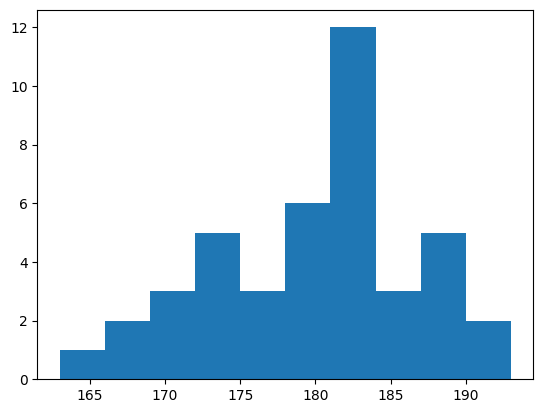

In [177]:
import matplotlib.pyplot as plt
plt.hist(heights_np)

In [178]:
np.array([1,2,3])+3

array([4, 5, 6])

### 브로드캐스팅
+ 규칙1 : 두 배열의 차원 수가 다르면 작은 차원의 배열 형상 앞(왼쪽)을 1로 채움
+ 규칙2 : 두 배열의 형상이 어떤 차원에서도 일치하지 않으면 해당 차원의 형상이 1인 배열이 다른 형상과 일치하도록 늘어남
+ 규칙3 : 임의의 차원에서 크기가 일치하지 않고 1도 아니라면 오류 발생


In [186]:
M = np.ones((2,3))
a = np.arange(3)

M.shape, a.shape

((2, 3), (3,))

In [189]:
# 규칙 1에 따라 a가 작으므로 왼쪽을 1로 채움 (3,) -> (1,3)
# 규칙 2에 따라 첫번째 차원이 일치하지 않으므로 해당 차원을 늘임 (1,3) -> (2,3)
M+a

array([[1., 2., 3.],
       [1., 2., 3.]])

In [195]:
a = np.arange(3).reshape(3,1)
b = np.arange(3)

a.shape, b.shape, a, b

((3, 1),
 (3,),
 array([[0],
        [1],
        [2]]),
 array([0, 1, 2]))

In [203]:
a+b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

#### 배열의 중앙 정렬 (브로드캐스팅 + mean)

In [281]:
x = np.random.random((10,3))
xmean = x.mean(0)

print(f"배열 x:\n{x}\n xmean : {xmean}\n np.sum(x,axis=0)/10 : {np.sum(x,axis=0)/10}")

배열 x:
[[0.0308607  0.04392117 0.98865278]
 [0.66067589 0.74598937 0.28215987]
 [0.96632443 0.89435168 0.10954031]
 [0.35269384 0.41555137 0.41012213]
 [0.9213801  0.17289761 0.57837178]
 [0.98513413 0.70141723 0.31126168]
 [0.79503626 0.66789921 0.54268685]
 [0.26162781 0.44099427 0.07099592]
 [0.91944194 0.33239196 0.07510306]
 [0.6435669  0.00809756 0.71720042]]
 xmean : [0.6536742  0.44235114 0.40860948]
 np.sum(x,axis=0)/10 : [0.6536742  0.44235114 0.40860948]


In [282]:
x_centered = x - xmean
x_centered.shape, x_centered.mean(0)

((10, 3), array([8.88178420e-17, 5.55111512e-17, 0.00000000e+00]))

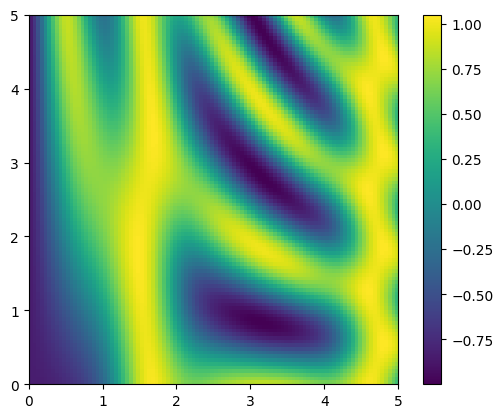

In [259]:
x = np.linspace(0, 5, 100)
y = np.linspace(0, 5, 100)[:, np.newaxis]

z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

import matplotlib.pyplot as plt

plt.imshow(z, origin='lower', extent = [0, 5, 0, 5], cmap='viridis')
plt.colorbar();

(array([245.,  14.,  13.,  17.,   8.,   6.,   5.,   6.,   4.,   3.,   7.,
          6.,   3.,   3.,   3.,   4.,   4.,   2.,   4.,   0.,   0.,   1.,
          1.,   1.,   0.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  0.   ,  11.675,  23.35 ,  35.025,  46.7  ,  58.375,  70.05 ,
         81.725,  93.4  , 105.075, 116.75 , 128.425, 140.1  , 151.775,
        163.45 , 175.125, 186.8  , 198.475, 210.15 , 221.825, 233.5  ,
        245.175, 256.85 , 268.525, 280.2  , 291.875, 303.55 , 315.225,
        326.9  , 338.575, 350.25 , 361.925, 373.6  , 385.275, 396.95 ,
        408.625, 420.3  , 431.975, 443.65 , 455.325, 467.   ]),
 <BarContainer object of 40 artists>)

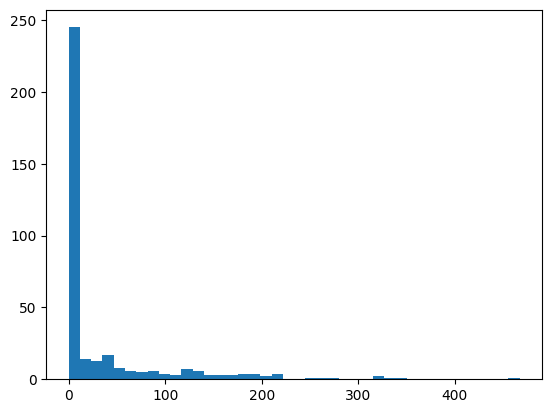

In [283]:
with open('data/Seattle2014.csv') as f:
    f.readline()
    rainfall=[]
    for line in f.readlines():
        rainfall.append(int(line.rstrip().split(',')[3]))
rainfall_np = np.asarray(rainfall)

plt.hist(rainfall_np, 40)

In [287]:
np.sum(rainfall_np > 5)

127

### 팬시 인덱싱
+ 한 번에 여러 배열의 요소에 접근
+ 결과는 인덱스 배열의 형상을 반영함

In [339]:
a = np.arange(1,11)
print(a[2],a[3],a[5])

fancy = [2,3,5]
print(a[fancy])


3 4 6
[3 4 6]


In [356]:
a = np.arange(1,13).reshape(3,4)
idx = np.array([[0,1],[1,2]])

print(a[idx])

row = np.array([0,1])
col = np.array([1,2])

print(a[row, col])



[[[ 1  2  3  4]
  [ 5  6  7  8]]

 [[ 5  6  7  8]
  [ 9 10 11 12]]]
[2 7]


#### 팬시 인덱싱을 이용한 임의의 점 20개 선택

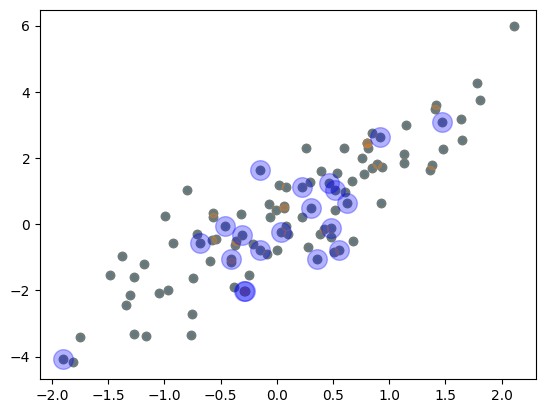

In [325]:
mean = [0,0]
cov = [[1,2],[2,5]]
rand = np.random.RandomState(42)
X = rand.multivariate_normal(mean, cov, 100)
X.shape
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])

indices = np.random.choice(X.shape[0], 20, replace=False)
selection = X[indices]
selection.shape

plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1], facecolor='blue', s=200, alpha=0.3)

In [335]:
rand =np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

print("열 기준 정렬 : ",np.sort(X, axis=0), sep='\n')
print("행 기준 정렬 : ",np.sort(X, axis=1), sep='\n')

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]
열 기준 정렬 : 
[[2 1 4 0 1 5]
 [5 2 5 4 3 7]
 [6 3 7 4 6 7]
 [7 6 7 4 9 9]]
행 기준 정렬 : 
[[3 4 6 6 7 9]
 [2 3 4 6 7 7]
 [1 2 4 5 7 7]
 [0 1 4 5 5 9]]
